## **<font color="green">Комментарий наставника</font>**

Привет! Меня зовут Наталья, я теперь буду наставницей в твоей группе. Спасибо за вовремя сданную работу :)
    
В файле ты найдешь комментарии к проекту, они будут в отдельных ячейках Markdown с заголовком «Комментарий наставника», пожалуйста, не удаляй их. Так мне будет проще проверять твою работу в следующий раз. Наиболее критиченые комментарии, которые влияют на то будет ли зачтены работа, будут отмечены <font color="red">красным </font>.

# Шаг №1. Импортируем файлы и необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
from pymystem3 import Mystem
import matplotlib.pyplot as plt
import math
from scipy import stats as st

In [2]:
query_1 = pd.read_csv('/datasets/query_1.csv')
print(query_1)
query_1.info()

                 model  flights_amount
0      Airbus A319-100             607
1      Airbus A321-200             960
2       Boeing 737-300             630
3       Boeing 767-300             600
4       Boeing 777-300             300
5   Bombardier CRJ-200            4446
6   Cessna 208 Caravan            4557
7  Sukhoi SuperJet-100            4185
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


In [3]:
query_3 = pd.read_csv('/datasets/query_3.csv')
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


## Топ - 10 городов по количеству рейсов.

               city  average_flights
43           Москва       129.774194
70  Санкт-Петербург        31.161290
54      Новосибирск        17.322581
33       Красноярск        11.580645
20     Екатеринбург        11.322581
67   Ростов-на-Дону        10.193548
63            Пермь        10.129032
10           Брянск        10.000000
74             Сочи         9.612903
84        Ульяновск         9.580645


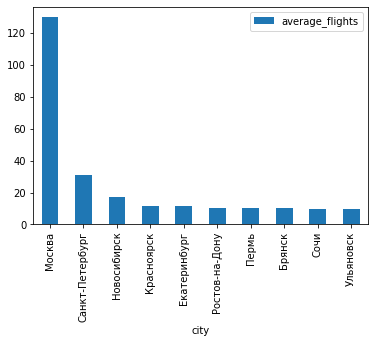

In [4]:
print(query_3.sort_values(by='average_flights', ascending = False).head(10))
query_3.sort_values(by='average_flights', ascending = False).head(10).plot(x='city',y='average_flights',kind='bar')

<b>Вывод:</b> В абсолютных лидерах по количеству рейсов в день - Москва, второе место - Петербург, третье - Новосибирск. Дальше разница между 4-ым и 10-ым местом составляет всего 2 рейса в день и распределение по местам идет за счет десятых долей рейсов.

## Модели самолетов и количество рейсов.

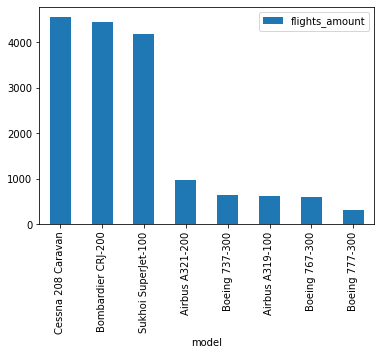

In [5]:
query_1.sort_values(by='flights_amount', ascending = False).head(10).plot(x='model',y='flights_amount',kind='bar')

<b>В моделях самолетов преимущество захватили три модели - Bombardier CRJ-200, Cessna 208 Caravan, Sukhoi SuperJet-100 c количеством рейсов <font color='blue'>более 4-х тысяч</font>, у остальных моделей <font color='blue'>меньше тысячи рейсов</font> на каждую.</b>

## Города и количество рейсов.

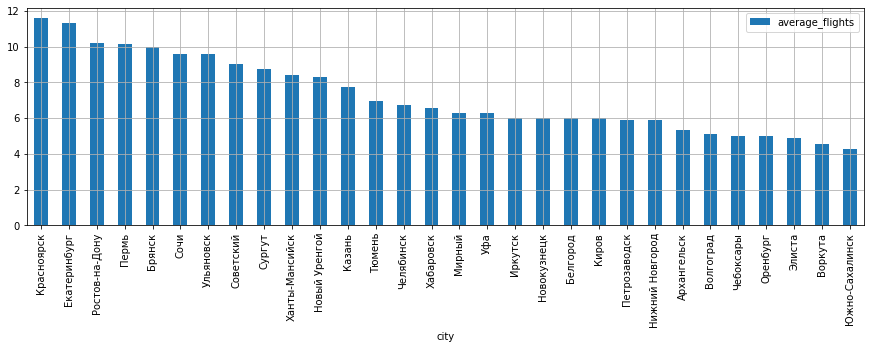

In [6]:
query_3.query('average_flights<17').sort_values(by='average_flights', ascending = False).head(30).plot(x='city',y='average_flights', kind='bar', figsize=(15, 4), grid=True)

<b>Количество рейсов в городах ниже первой тройки значительно меньше и находится в пределах 4-12 рейсов</b>

## **<font color="green">Комментарий наставника</font>**

Можно еще построить график без первой тройки, тогда 4 место начнет отличаться от последнего хотя бы в два раза.

# Проверка гипотезы средствами Python.

In [7]:
query_last = pd.read_csv('/datasets/query_last.csv')
print(query_last)
query_last.info()

   week_number  ticket_amount  festival_week festival_name
0           30          43568           30.0     Park Live
1           31          51034           31.0  Пикник Афиши
2           32          51675            NaN           NaN
3           33          51378            NaN           NaN
4           34          51492            NaN           NaN
5           35          51360            NaN           NaN
6           36          51386           36.0       Видфест
7           37          51670            NaN           NaN
8           38          51518            NaN           NaN
9           39          51623            NaN           NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 400.0+ bytes


### «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время»

<ol type= «1″>
<li><b>Нулевая гипотеза - Средний спрос на билеты во время фестивалей <font color='blue'>не отличается</font> от среднего спроса на билеты в обычное время</b></li>
<li><b>Альтернативная гипотеза - Средний спрос на билеты во время фестивалей <font color='blue'>отличается</font> от среднего спроса на билеты в обычное время</b></li>      
</ol>

Формируем наши датасеты. Проводим срезы по неделям.

In [8]:
sample_1 = query_last[query_last['festival_name'].isna()].loc[:,'ticket_amount']
sample_2 = query_last[~query_last['festival_name'].isna()].loc[:,'ticket_amount']

Задаем уровень критической важности, если р-value окажется меньше него - отвергаем нулевую гипотезу и принимаем альтернативную.

In [9]:
alpha = .05

Проверяем гипотезу о равенстве средних двух независимых совокупностей.

In [10]:
results = st.ttest_ind(
    sample_2, 
    sample_1)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.09688869045922928
Не получилось отвергнуть нулевую гипотезу


In [11]:
print(' Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время и с вероятностью {:%} это будет случайно.'.format(results.pvalue))

 Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время и с вероятностью 9.688869% это будет случайно.


<b>Средний спрос во время фестивалей не отличается от среднего спроса в обычное время, что может говорить о том, что добираться на самолете не выгодно или большая часть посетителей фестивалей - москвичи</b>

## **<font color="green">Комментарий наставника</font>**

У тебя получилось p-value равное 0.097, это означает, что в 9,7% случаев различия между выборками получились случайно, если бы выборки на самом деле были одинакомыми. 9,7% это достаточно большая вероятность, поэтому ей нельзя принебречь и отвергнуть нулевую гипотизу не получится. Но и утверждать, что выборки не отличаются тоже нельзя. Тут скорее вывод, что по этим данным мы не сможем с уверенностью сказать отличаются ли недели с фестивалями от недель без фестивалей или нет.

## **<font color="green">Комментарий наставника</font>**

Все хорошо, только общего вывода не хватает..

## Общий вывод

<ol type= «1″>
<li><b>Среди моделей самолетов совершающих перелеты по России есть три лидера - <font color='blue'>Bombardier CRJ-200, Cessna 208 Caravan, Sukhoi SuperJet-100</font> c количеством рейсов около <font color='blue'>4-х тысяч</font> на каждую модель, остальные модели отстают по количеству соверешнных рейсов более чем в <font color='blue'>4-ре раза</font></b></li>
<li><b>Среди городов по количеству рейсов в день абсолютным лидером является <font color='blue'>Москва</font> с 129 рейсами в день, города ниже топ-3 имеют 4-12 рейсов в день</b></li>
<li><b>После проверки гипотезы о разнице спроса на авиабилеты во время фестивалей и в обычные недели мы не может с уверенностю сказать, что спрос отличается или нет.</b></li>
</ol>